In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pathlib import Path
import math
from matplotlib.colors import ListedColormap
import math
from itertools import combinations

from datetime import time, timedelta, datetime, date


# Definição de diretórios e Disco de leitura dos arquivos (Desktop ou Notebook) 
config_dirs = open("prefixo_dados.txt").readlines() 
DIR_PREFIXO = Path(config_dirs[0].strip())


DIRETORIO_PRINCIPAL =  DIR_PREFIXO / "Projeto_PA" / "Projeto_PA_validado"
DIRETORIO_DATASET = DIR_PREFIXO / "Projeto_PA"
DIR_ABORDAGENS = DIRETORIO_PRINCIPAL / "analise_abordagens"
DIR_KMEANS = DIRETORIO_PRINCIPAL / "KMeansRandom"
DIR_NMF = DIRETORIO_PRINCIPAL / "NMF"
DIR_KMEDOIDS = DIRETORIO_PRINCIPAL / "KMedoids"


In [2]:
caminho = DIRETORIO_PRINCIPAL / DIR_KMEANS
caminho
diretorios = {'kmeans':DIR_KMEANS, 'nmf':DIR_NMF, 'kmedoids':DIR_KMEDOIDS}

nome_abordagem = {'cadastro':"_approach_cadastro", 'doenca':"_approach_doenca",
                  'medidas':"_approach_medidas",'estatistica':"_approach_estatistica",
                 'escolho_doenca':"_approach_escolho_doenca", 'categorias':"_approach_classes",
                 'medidas_masc':"_approach_medidas_masc",'medidas_fem':"_approach_medidas_fem"}

In [3]:
#DIR_DICT / f"Dict_approach_doenca
#_grupo_{grupo}.csv", 

# Análise é uma opção do dicionário criado na célula acima
algoritmo = input("Informe a analise ")

caminho_medidas = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas']}"
caminho_estatistica = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['estatistica']}"
caminho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['doenca']}"
caminho_cadastro = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['cadastro']}"
caminho_escolho_doenca = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['escolho_doenca']}"
caminho_categorias = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['categorias']}"
caminho_medidas_masc = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_masc']}"
caminho_medidas_fem = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['medidas_fem']}"
#caminho_cadastro_kmedoids = diretorios[algoritmo.lower()]/ f"{algoritmo.upper()}{nome_abordagem['cadastro']}"

Informe a analise kmeans


In [4]:
f"{caminho_estatistica}_todos_pacientes.csv"

'D:\\Projeto_PA\\Projeto_PA_validado\\KMeansRandom\\KMEANS_approach_estatistica_todos_pacientes.csv'

In [5]:
ls_abordagens = list()
ls_nomes = list()

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_estatistica}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('estatistica')
except:
    pass

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_medidas}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('medidas')
except:
    pass

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_doenca}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('doenca')
except:
    pass

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_cadastro}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('cadastro')
except:
    pass

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_escolho_doenca}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('escolho_doenca')
except:
    pass

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_categorias}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('categorias')
except:
    pass

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_medidas_masc}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('medidas_masc')
except:
    pass

try:
    ls_abordagens.append(pd.read_csv(f"{caminho_medidas_fem}_todos_pacientes.csv", sep=";", encoding='latin1'))
    ls_nomes.append('medidas_fem')
except:
    pass


In [6]:
df_medidas = ls_abordagens[1]
df_medidas = df_medidas[df_medidas['grupo'] == 5]
df_medidas['genero'].describe()

count     742
unique      2
top         F
freq      378
Name: genero, dtype: object

In [7]:
#print(f"{caminho_doenca}_grupo_{1}.csv")


## Funções

In [8]:
def faixas_imc(imc):
    classes = ["Peso Normal","Sobrepeso", "Obesidade"]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = ["baixo peso","normal","sobrepeso","obesidade grau I","obesidade grau II","obesidade Grau III"]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
        
def faixas_imc_classe(imc):
    classes = [1, 2, 3]
    intervalos = [(0, 25),(25, 30),(30, 1000)]
    #classes = [1, 2, 3, 4, 5, 6]
    #intervalos = [(0, 18),(18, 25),(25, 30),(30, 35),(35, 40),(40, 1000)]
    
    for faixa in range(len(classes)):
        if imc < intervalos[faixa][1]:
            return classes[faixa]
    
def faixas_etarias(idade):
    classes = ["Adultos","Meia-idade","Idoso"]
    intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = ["Jovens","Adultos","Meia-idade","Idoso", "Ancião","Velhice extrema"]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def faixas_etarias_classe(idade):
    classes = [1, 2, 3]
    intervalos = [(0, 50),(50, 65),(65, 200)]
    #classes = [1, 2, 3, 4, 5, 6]
    #intervalos = [(0, 20),(20, 45),(45, 60),(60, 75),(75, 90),(90, 200)]
    
    for faixa in range(len(classes)):
        if idade <= intervalos[faixa][1]:
            return classes[faixa]

def faixa_genero(genero):
    if genero == 'M':
        return 0
    else:
        return 1

def verifica_grupo(coluna,grupo):
    saida = list()
    
    for linha in coluna:
        if linha == grupo:
            saida.append(1)
        else:
            saida.append(0)
    return saida

genero_1_0 = {'genero':{'M':0,'F':1}}

def modifica_df(df,abordagem):
    df = df.loc[:,:'diast 8:45']
    grupos  = set(df['grupo'])
    for grupo in grupos:
        df[f'cluster{grupo}'] = verifica_grupo(df['grupo'],grupo)
    df = df.replace(genero_1_0)
    df['IMC'] = df['IMC'].apply(faixas_imc_classe)
    df['idade'] = df['idade'].apply(faixas_etarias_classe)
    df = df.drop(['data_nascimento','peso','altura','grupo','data_exame'],axis=1)
    
    df.to_csv(DIR_ABORDAGENS / "todos_pacientes" / f'todos_pacientes_{abordagem}.csv', 
                           sep=";", encoding="latin1", index=False)
    return df

def modifica_df_cluster(df,abordagem):
    df = df.loc[:,:'diast 8:45']
    #grupos  = set(df['grupo'])
    #for grupo in grupos:
    #    df[f'cluster{grupo}'] = verifica_grupo(df['grupo'],grupo)
    df['Cluster'] = df['grupo']
    df = df.replace(genero_1_0)
    df['IMC'] = df['IMC'].apply(faixas_imc_classe)
    df['idade'] = df['idade'].apply(faixas_etarias_classe)
    df = df.drop(['data_nascimento','peso','altura','grupo','data_exame'],axis=1)
    
    df.to_csv(DIR_ABORDAGENS / "todos_pacientes" / f'todos_pacientes_cluster_{abordagem}.csv', 
                           sep=";", encoding="latin1", index=False)
    return df


# Conta a quantidade de Picos = medidas acima ou abaixo do valor de referência

def conta_picos (df, qtd_medidas ,sist_max=140, sist_min=100, diast_max=90, diast_min=60) :
    sist = df.loc[:,'sist 9:00':'sist 8:45']
    diast = df.loc[:,'diast 9:00':'diast 8:45']
    
    saida = pd.DataFrame()
    saida2 = pd.DataFrame()
    contador = 0  
    
    for medida in range(0, len(sist.columns)):
        if contador == 0 :
            ls_sist_max = list()
            ls_sist_min = list()
            ls_sist_nor = list()
            
            if medida >= 56 and medida <= 69 :  
                dia_noite = int(qtd_medidas / 2)
            else :
                dia_noite = qtd_medidas
                
            contador = dia_noite - 1
            colunas = list(sist.iloc[:,medida:medida + dia_noite].columns)
            for linha in sist.iloc[:,medida:medida + dia_noite].values:
                qtd_max = 0
                qtd_min = 0
                qtd_nor = 0
                for i in range(len(linha)):
                    if linha[i] > sist_max:
                        qtd_max += 1
                    elif linha[i] < sist_min:
                        qtd_min += 1
                    else:
                        qtd_nor += 1
                        
                ls_sist_max.append(qtd_max)
                ls_sist_min.append(qtd_min)
                ls_sist_nor.append(qtd_nor)

            nome = 'Sist ' + colunas[0].split(' ')[1] + ' - ' + colunas[-1].split(' ')[1]

            saida[f'{nome} Max'] = ls_sist_max
            saida[f'{nome} Min'] = ls_sist_min
            saida[f'{nome} Normal'] = ls_sist_nor
            
            saida2[f'{nome} Max'] = ls_sist_max
            saida2[f'{nome} Min'] = ls_sist_min
        else : 
            contador -= 1
            
        
    for medida in range(0, len(diast.columns)):
        if contador == 0 :
            ls_diast_max = list()
            ls_diast_min = list()
            ls_diast_nor = list()

            if medida >= 56 and medida <= 69 :  
                dia_noite = int(qtd_medidas / 2)
            else :
                dia_noite = qtd_medidas
            contador = dia_noite - 1
            colunas = list(diast.iloc[:,medida:medida + dia_noite].columns)
            for linha in diast.iloc[:,medida:medida + dia_noite].values:
                qtd_max = 0
                qtd_min = 0
                qtd_nor = 0
                for i in range(len(linha)):
                    if linha[i] > diast_max:
                        qtd_max += 1
                    elif linha[i] < diast_min:
                        qtd_min += 1
                    else:
                        qtd_nor += 1
                        
                ls_diast_max.append(qtd_max)
                ls_diast_min.append(qtd_min)
                ls_diast_nor.append(qtd_nor)

            nome = 'Diast ' + colunas[0].split(' ')[1] + ' - ' + colunas[-1].split(' ')[1]

            saida[f'{nome} Max'] = ls_diast_max
            saida[f'{nome} Min'] = ls_diast_min
            saida[f'{nome} Normal'] = ls_diast_nor
            
            saida2[f'{nome} Max'] = ls_diast_max
            saida2[f'{nome} Min'] = ls_diast_min
        else : 
            contador -= 1
        
    return saida, saida2
 
def comb(n,k):
    return int(math.factorial(n) / (math.factorial(k)*math.factorial(n - k)))


def coluna_hora(horario):
    return float(horario.split(' ')[1].replace(':','.'))

def conta_picos_df(df,abordagem,qtd_picos):
    #lista_grupos = list()
    df_geral = pd.DataFrame()
    #for j in range(len(set(df['grupo']))):
    #df_grupo = df[df['grupo'] == j+1]
    contagem_picos, contagem_picos2 = conta_picos(df,4)

   # ls_valores = list()
   # for i in range(len(contagem_picos)) :
   #     ls_valores.append(sum(contagem_picos.iloc[i,:]))
   # novo_dataset = pd.DataFrame ()
    #novo_dataset['numero_identificacao'] = df_grupo['numero_identificacao']
    #novo_dataset ['qtd picos'] = ls_valores
    #novo_dataset = novo_dataset.sort_values(by=['qtd picos'], ascending=False)

    qtd_total_picos = np.sum(contagem_picos,axis=0).sort_values(ascending=False)
    qtd_total_picos = qtd_total_picos.to_frame().reset_index()
    qtd_total_picos.columns = ['Horário',f'QTD - {abordagem}']
    qtd_total_picos['%'] = np.round(qtd_total_picos[f'QTD - {abordagem}'] / sum(qtd_total_picos[f'QTD - {abordagem}']) * 100,3)
    qtd_total_picos['hora'] = qtd_total_picos['Horário'].apply(coluna_hora)
    qtd_total_picos = qtd_total_picos.sort_values(by=['hora','Horário'], ascending = True)
    qtd_total_picos = qtd_total_picos.drop(['hora'],axis=1)
    #qtd_total_picos.to_csv ( DIR_SALVA / f"frequencia_picos_{abordagem}_grupo{j+1}.csv", sep=";", encoding="latin1")
    qtd_total_picos.to_excel ( DIR_ABORDAGENS / "todos_pacientes" / "graficos_picos" / f"frequencia_picos_{abordagem}.xlsx", index = False)

    aux = np.sum(contagem_picos2,axis=0).sort_values(ascending=False)
    aux = aux.to_frame().reset_index()
    aux.columns = [f'Horário - {abordagem}',f'QTD - {abordagem}']
    aux = aux.iloc[:qtd_picos, :]
    aux['hora'] = aux[f'Horário - {abordagem}'].apply(coluna_hora)
    aux = aux.sort_values(by=['hora',f'Horário - {abordagem}'], ascending = True)
    aux = aux.drop(['hora'],axis=1)
    df_geral[f'Horário - {abordagem}'] = aux[f'Horário - {abordagem}'].values
    df_geral[f'QTD - {abordagem}'] = aux[f'QTD - {abordagem}']
    #lista_grupos.append(qtd_total_picos)
    df_geral.to_excel ( diretorios[algoritmo.lower()] / "todos_pacientes" / "graficos_picos" / f"frequencia_picos_comparativo_{abordagem}.xlsx", index = False)
    return qtd_total_picos, df_geral


def grafico_percentual(df_grafico, abordagem, medida, posicao):
    fig=plt.figure(figsize=(15,5))
    plt.grid(linestyle='--', linewidth = 0.5, color = 'gray')
    plt.title(f'% de picos {posicao} do valor de referência - {medida} - Abordagem {abordagem} - {algoritmo.upper()}', fontsize = 16)
    plt.ylabel('%',fontsize=12)
    plt.xlabel('Horário',fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.plot(df_grafico['Horário'],df_grafico['%'],'r.')
    #plt.figure(figsize=(25,10))
    plt.savefig(diretorios[algoritmo.lower()] / "todos_pacientes" / "graficos_picos" / f'grafico_qtd_picos_{posicao}_{medida}_{abordagem}_{algoritmo.upper()}.svg',
               bbox_inches="tight", pad_inches=1)
    plt.show()
    
#DIR_ABORDAGENS / "todos_pacientes" / "graficos_picos"

In [9]:
for abordagem, nome in zip(ls_abordagens,ls_nomes):
    modifica_df(abordagem,nome)

In [10]:
def sheila_cluster(df,abordagem):
    
    true_false_1_0 = {True:1, False:0}
    #df = df.loc[:,:'diast 8:45']
    #df['Cluster'] = df['grupo']
    df = df.replace(genero_1_0)
    #df['IMC'] = df['IMC'].apply(faixas_imc_classe)
    #df['idade'] = df['idade'].apply(faixas_etarias_classe)
    df = df.drop(['data_nascimento','peso', 'altura','data_exame'],axis=1)
    for coluna in ls_abordagens[0].loc[:,'Hipotensao':'Normotenso']:
        df[coluna] = df[coluna].replace(true_false_1_0)
    #print (df)
    df.to_csv(DIR_ABORDAGENS / "todos_pacientes" / f'sheilinha_todos_pacientes_cluster_{abordagem}.csv', 
                           sep=";", encoding="latin1", index=False)
    return df

for abordagem, nome in zip(ls_abordagens,ls_nomes):
    sheila_cluster(abordagem,nome)

In [11]:
sheila_cluster(ls_abordagens[0], ls_nomes[0]).head()

,numero_identificacao,genero,idade,IMC,grupo,sist 9:00,sist 9:15,sist 9:30,sist 9:45,sist 10:00,...,Mediana Diastolica em 24h,AUC Sistolica em 24h,AUC Diastolica em 24h,AUC PP Daytime,AUC PP Nighttime,DP Sistolica em 24h,DP Diastolica em 24h,Picos Sistolica,Picos Diastolica,Diferença % Dipping
0,4,0,94.0,33.2,6,105.0,108.0,116.0,104.0,106.0,...,59.0,9545.5,4902.0,3748.0,841.5,16.52,11.36,11,34,0.966110
1,5,0,70.0,29.4,1,103.0,114.0,82.0,104.0,98.0,...,62.0,8586.5,5034.5,2915.0,606.0,7.51,6.65,9,23,0.969464
2,6,0,19.0,25.8,4,147.0,148.0,156.0,140.0,130.0,...,79.0,10674.0,6154.0,3721.0,751.5,12.70,13.01,19,19,1.055812
3,7,1,40.0,24.2,4,140.0,139.0,142.0,137.0,135.0,...,80.0,10679.5,6420.5,3642.0,602.5,16.13,10.34,21,9,1.106757
4,8,0,28.0,40.6,7,113.0,110.0,101.0,108.0,111.0,...,78.0,9141.5,6118.0,2405.0,566.0,12.27,12.79,10,11,1.136996


In [12]:
for abordagem, nome in zip(ls_abordagens,ls_nomes):
    modifica_df_cluster(abordagem,nome)

De todos os pacientes tratados, gravar csv de todos que tem um determinado padrão (ex: Dipping =True), resultando em cluster_todos_dipping, cluster_todos_non_dipping, cluster_todos_whitecoat,.......
Calcular a Associação de cluster_todos_xxxxx com C1 a C7

In [13]:
#df_abordagem = ls_abordagens[0]
#df_abordagem

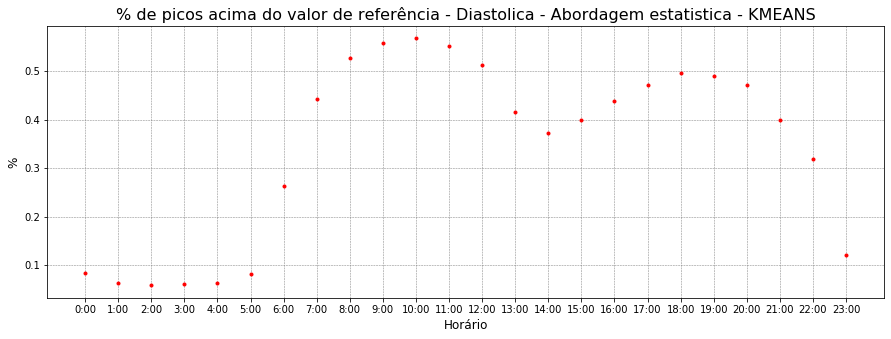

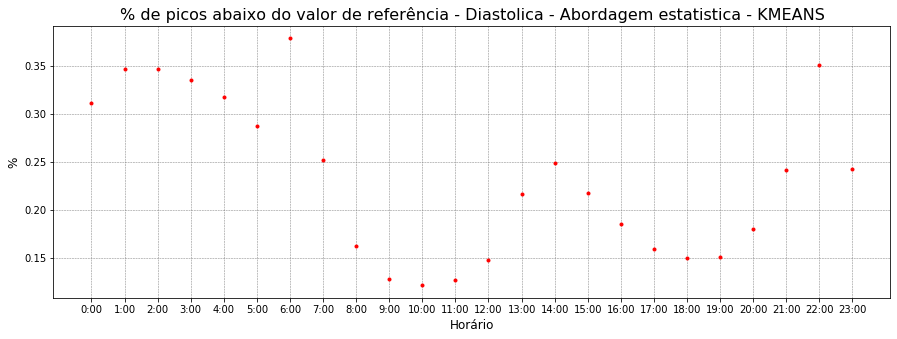

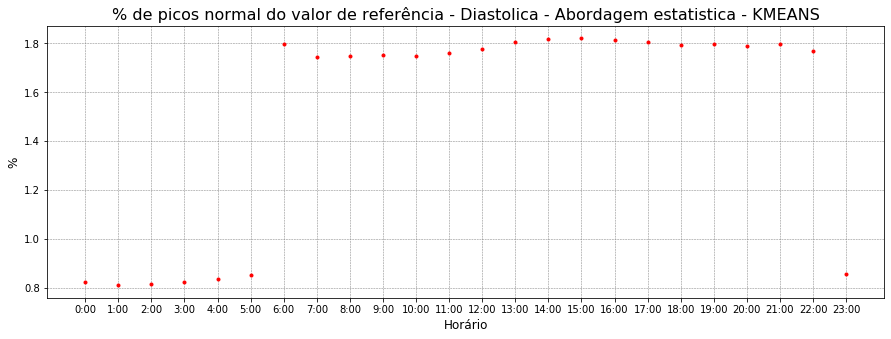

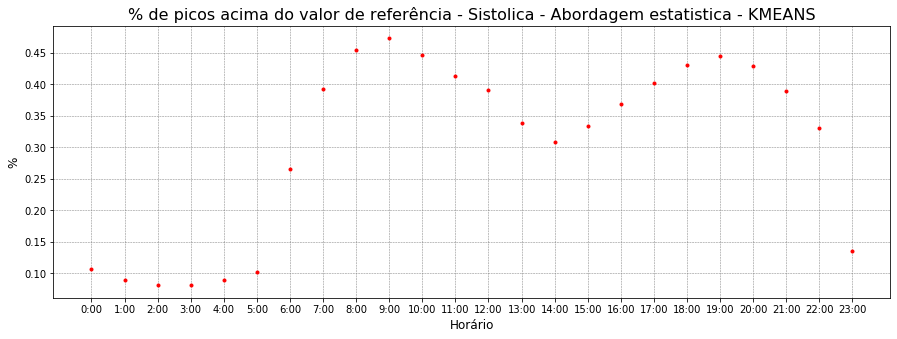

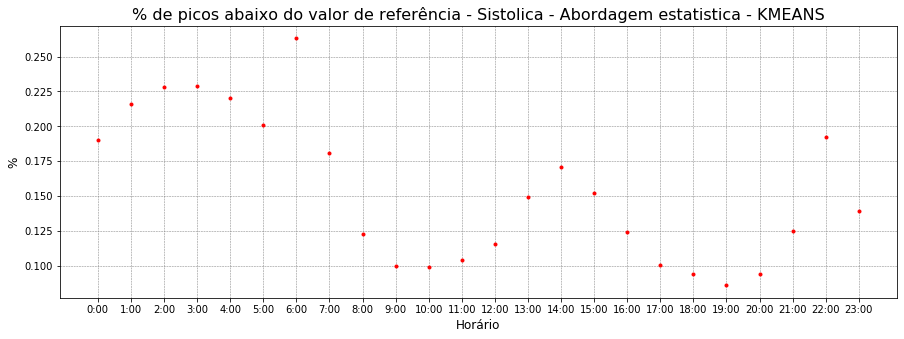

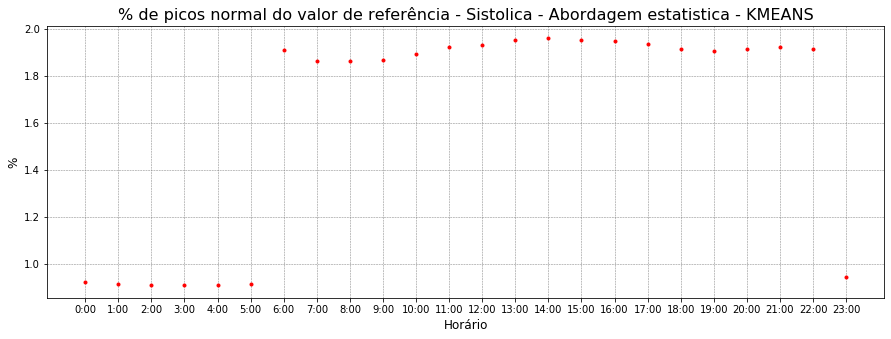

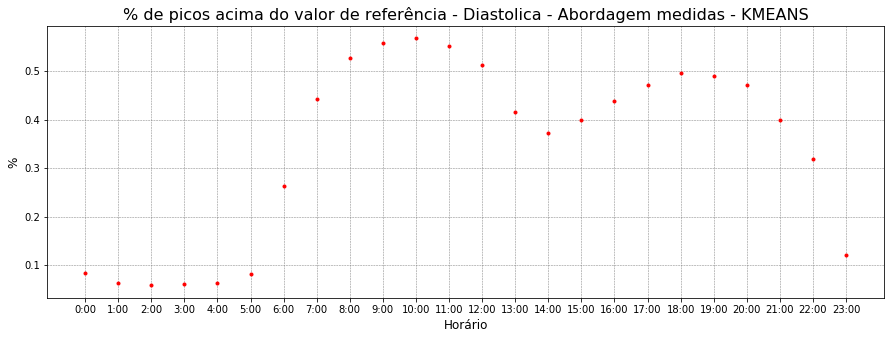

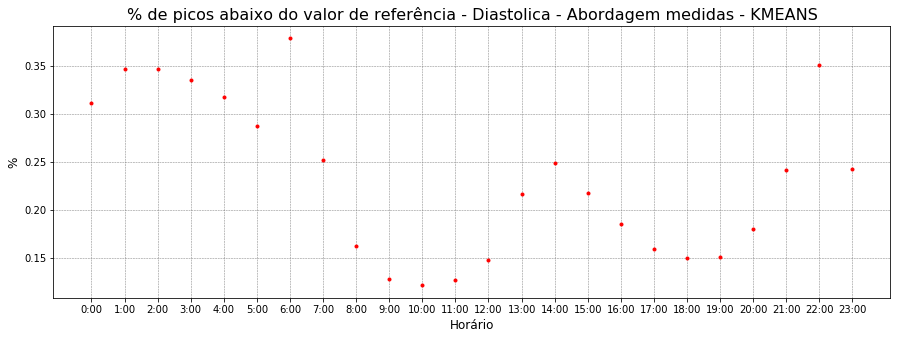

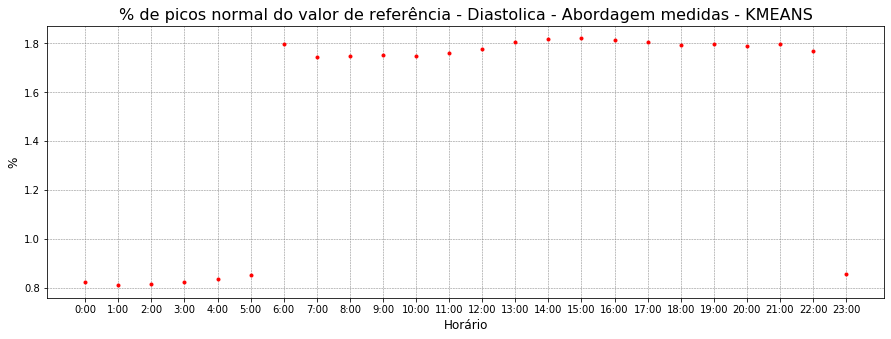

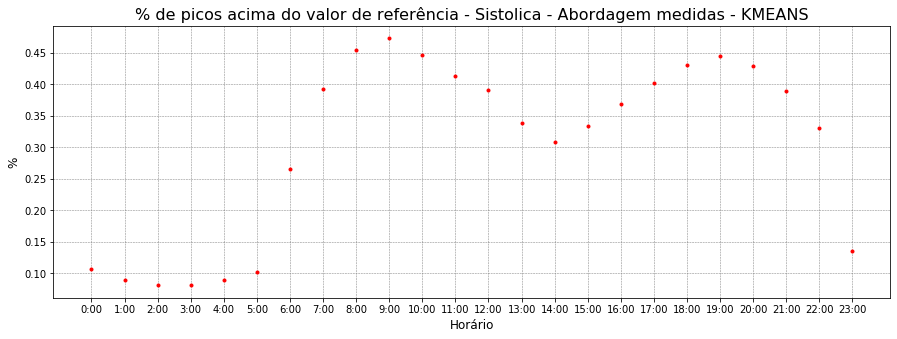

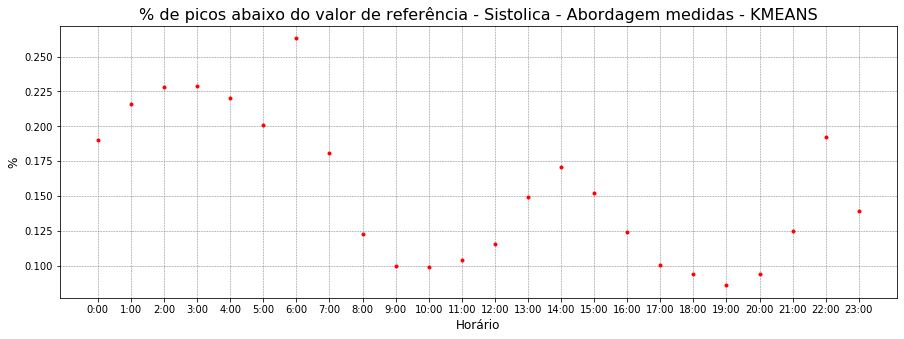

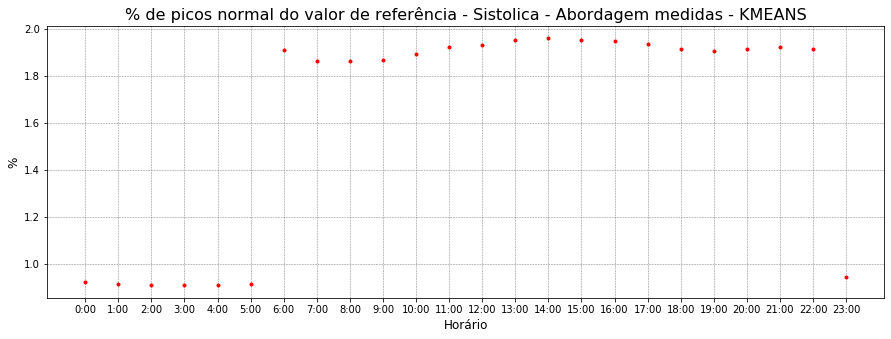

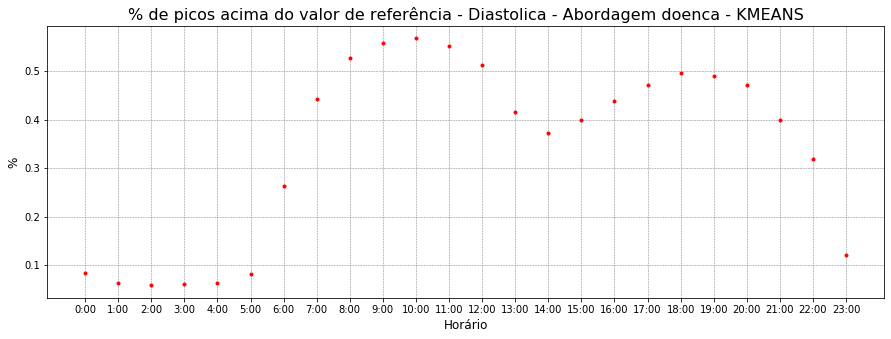

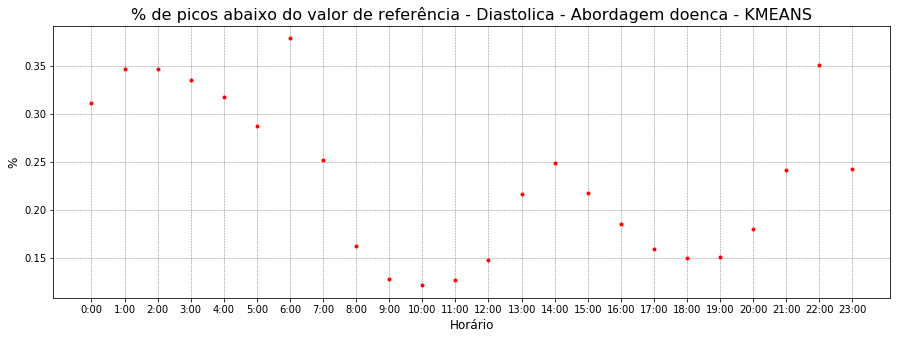

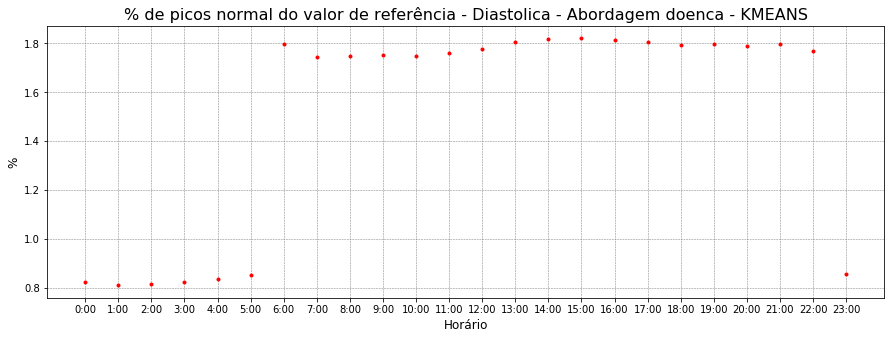

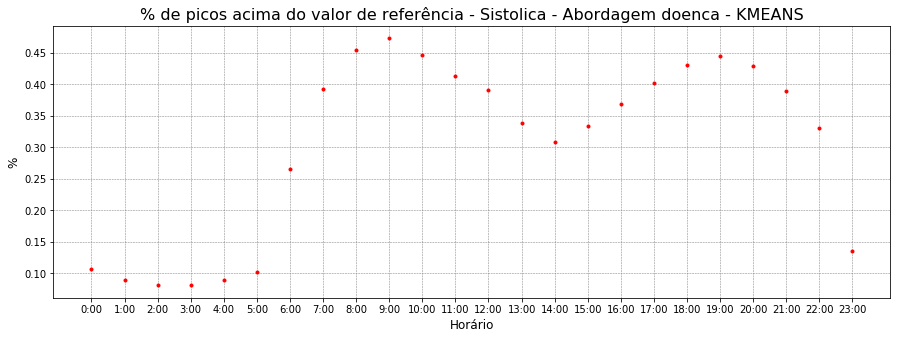

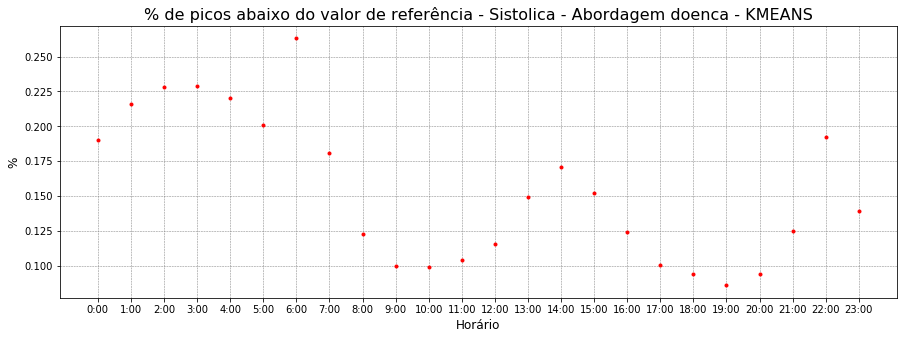

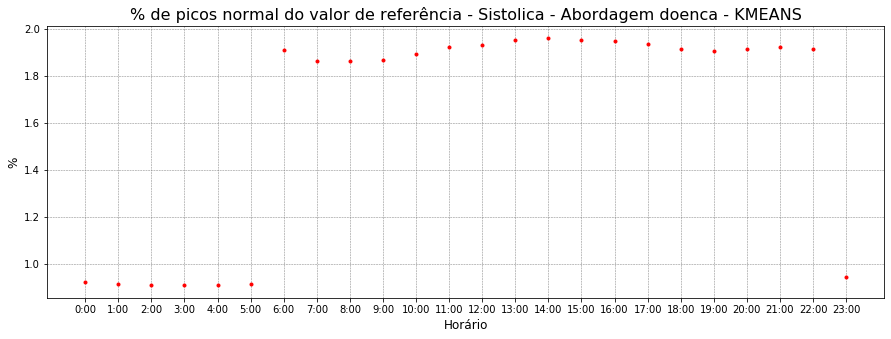

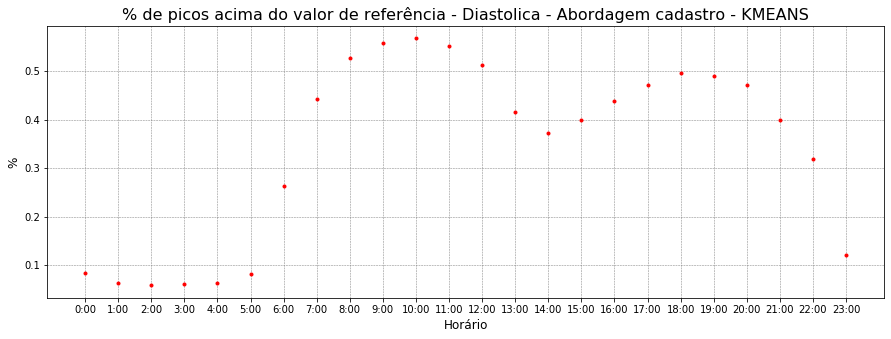

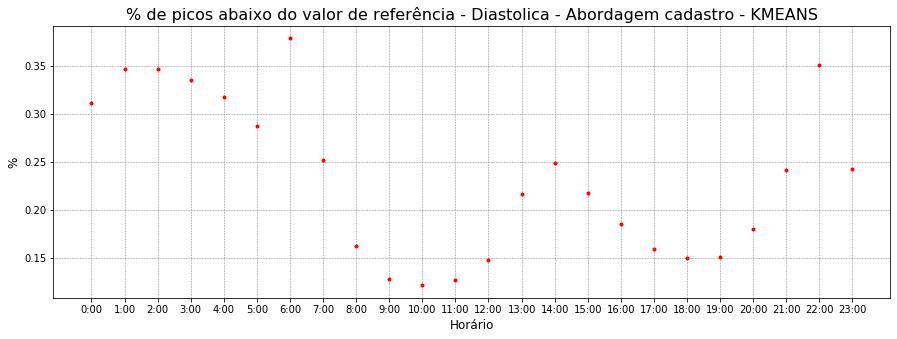

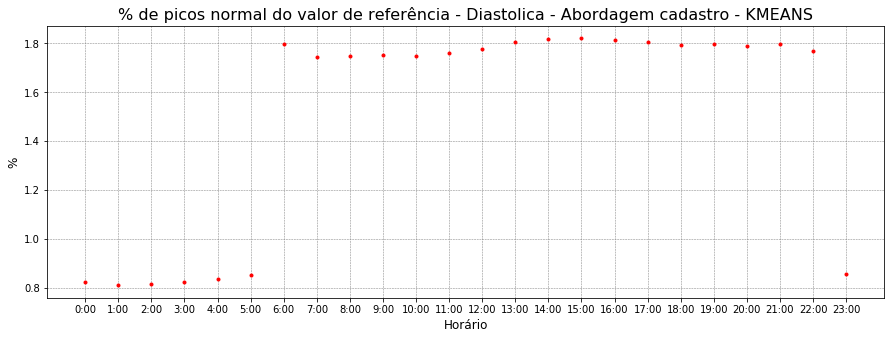

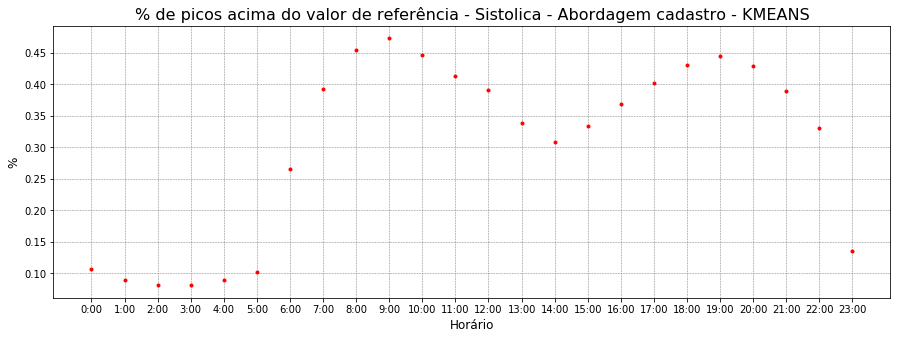

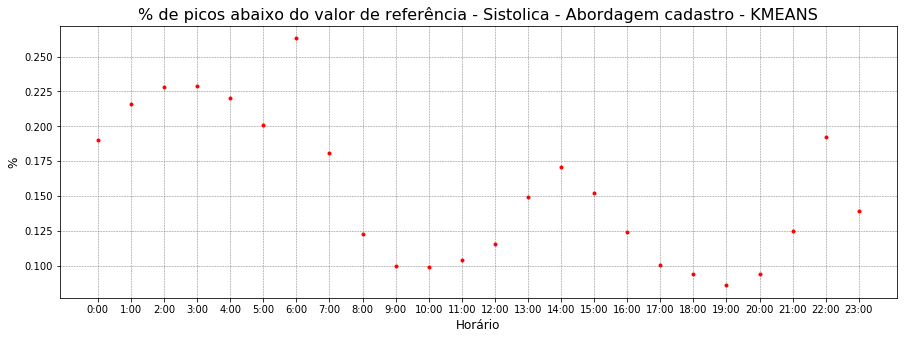

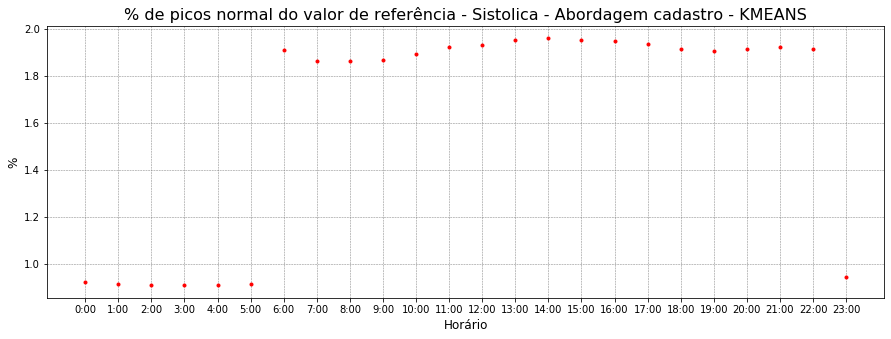

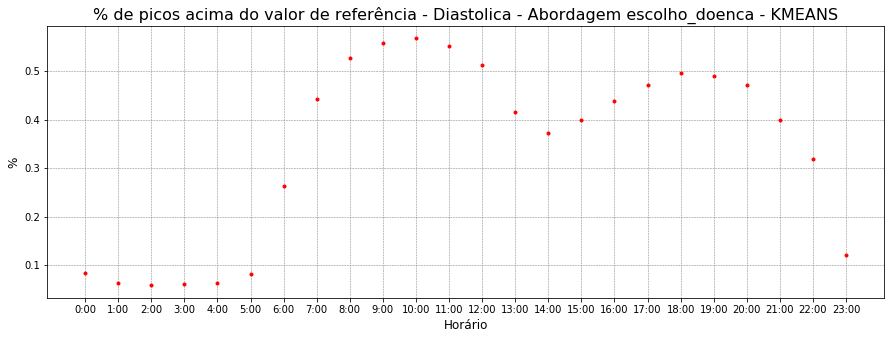

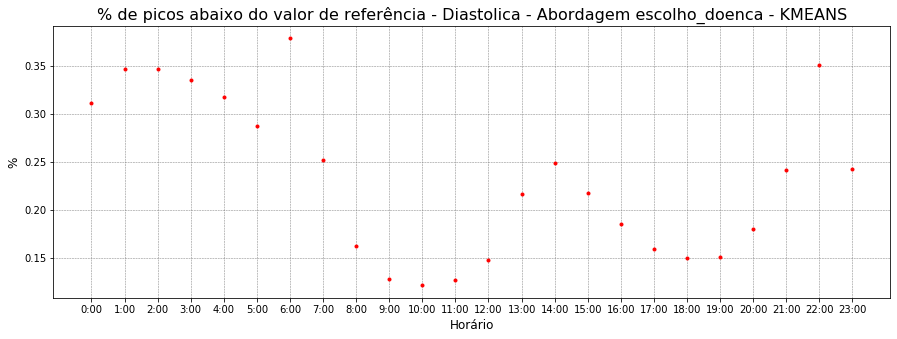

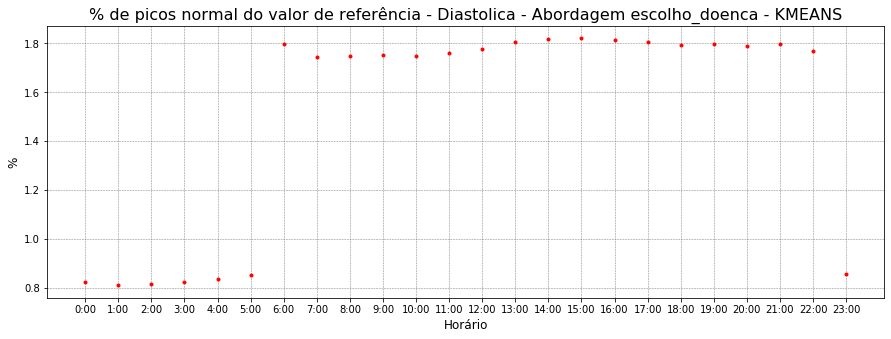

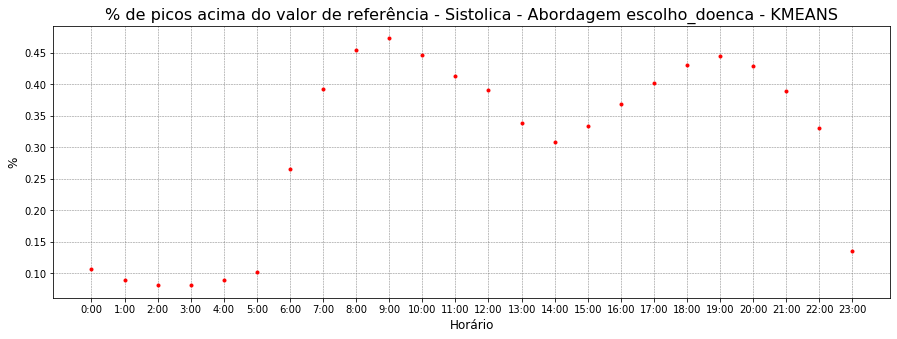

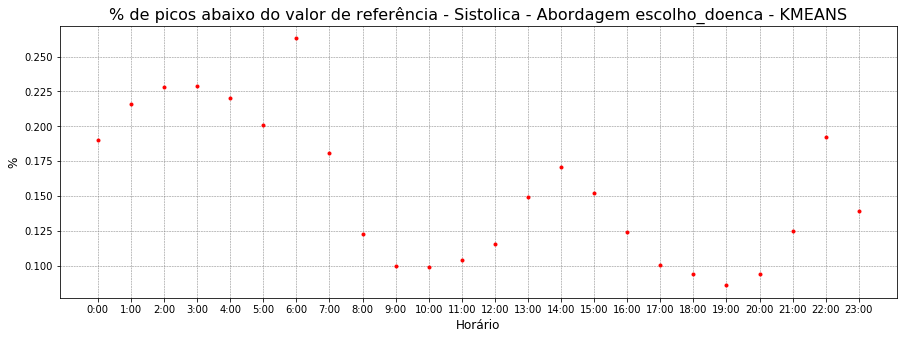

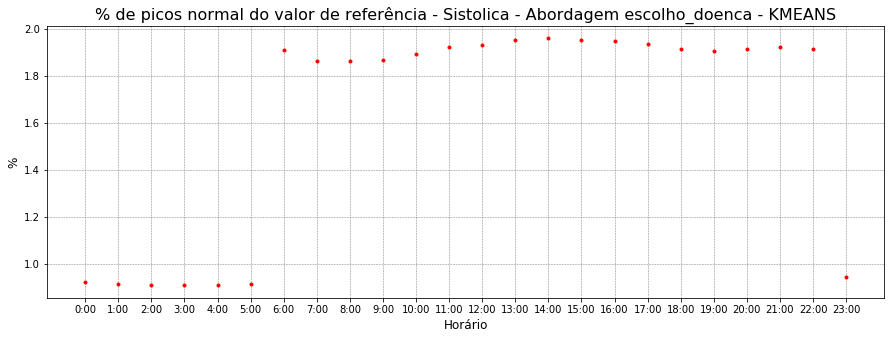

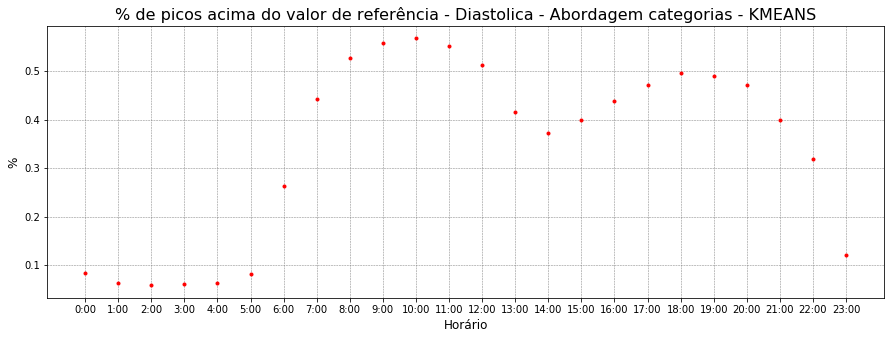

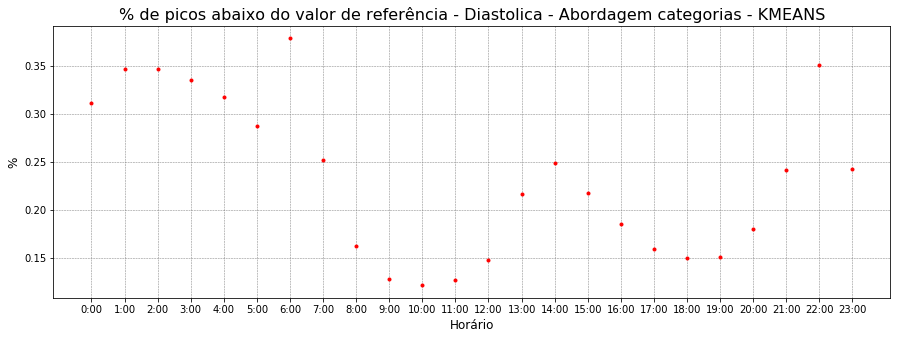

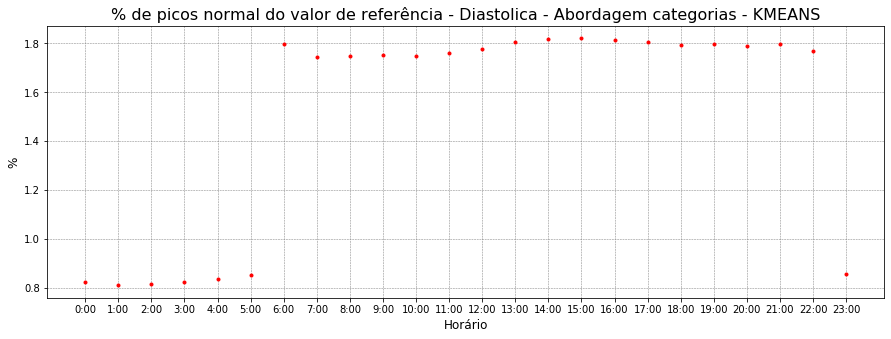

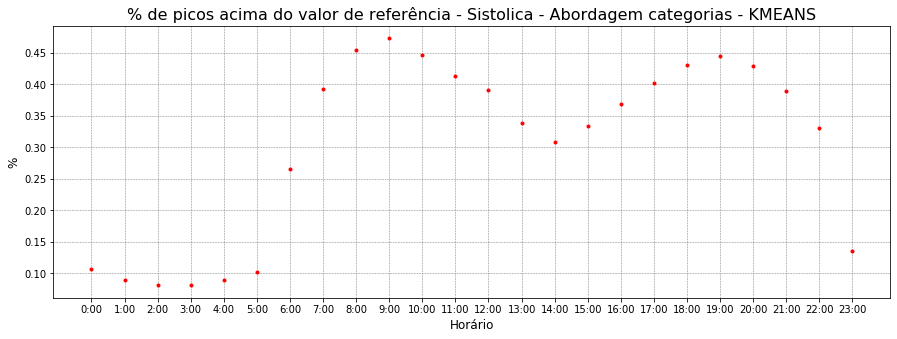

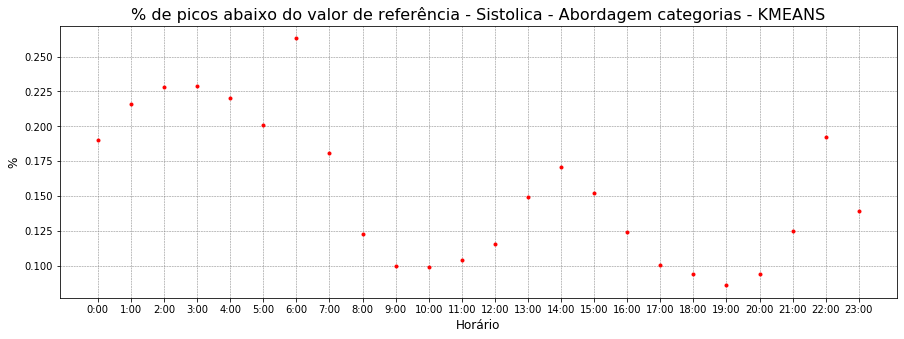

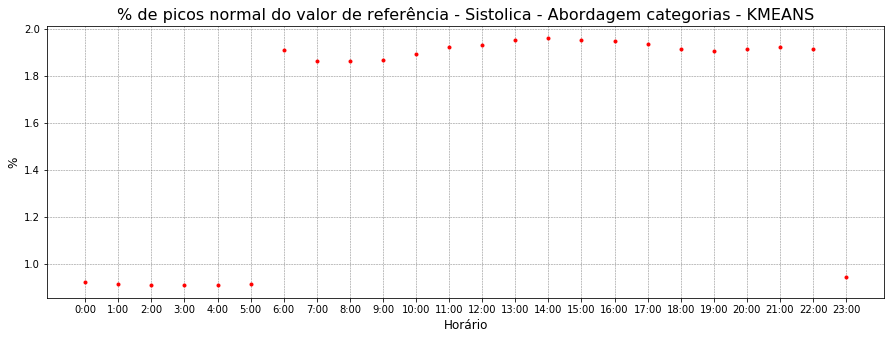

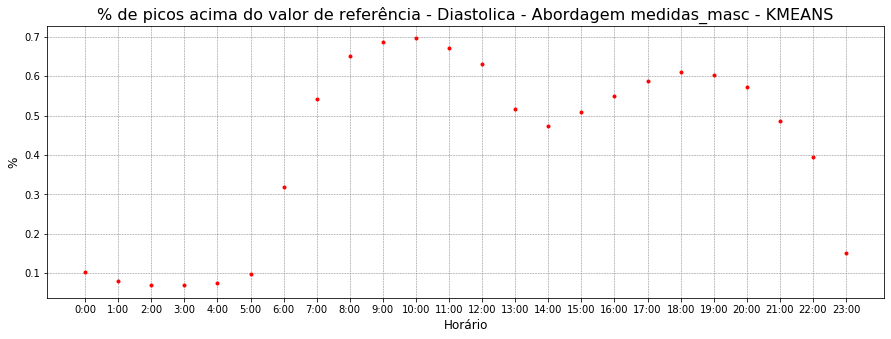

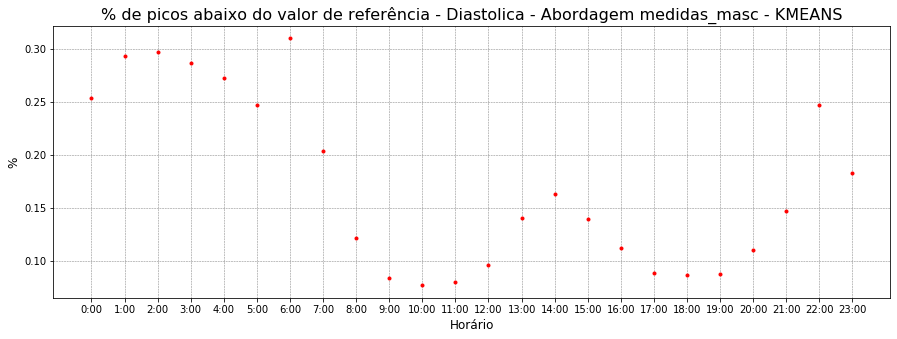

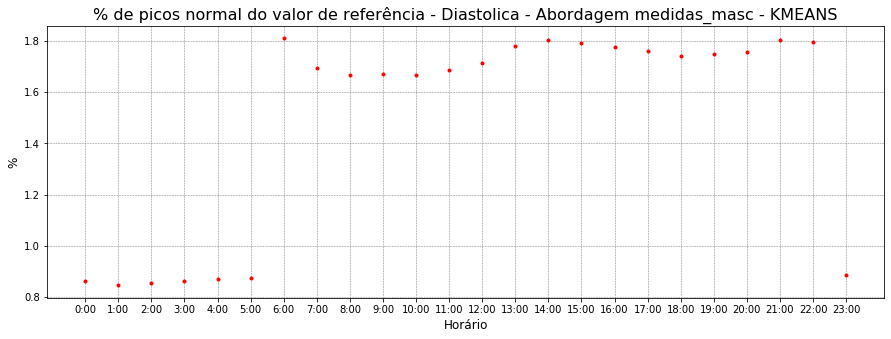

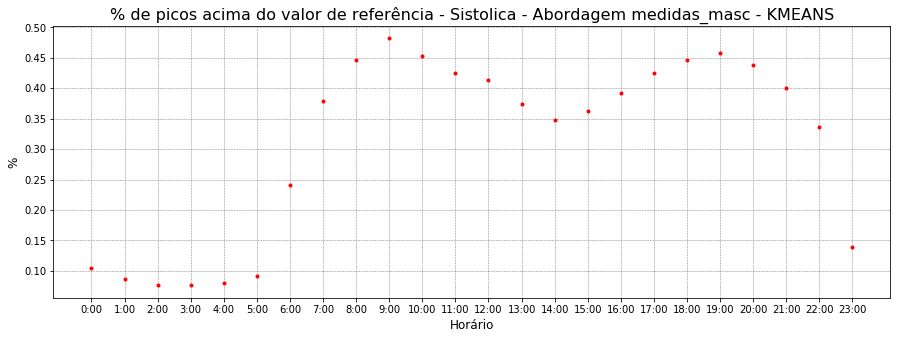

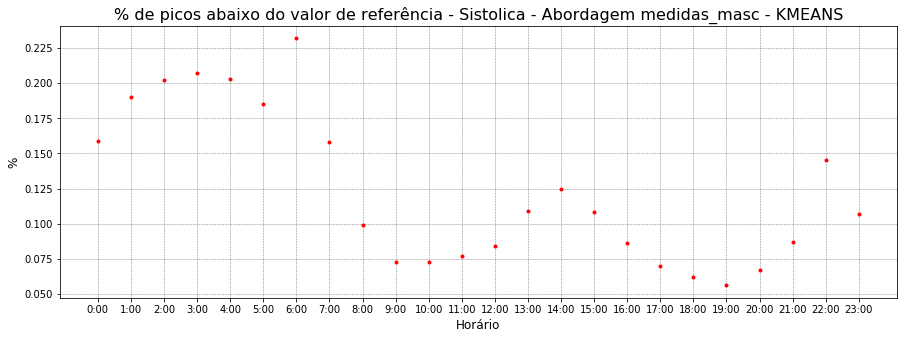

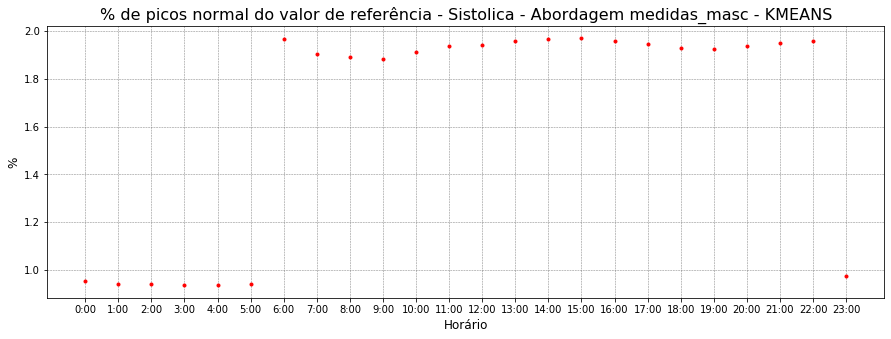

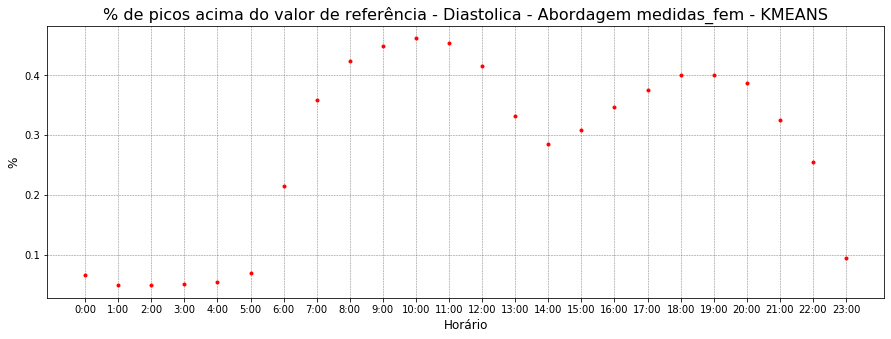

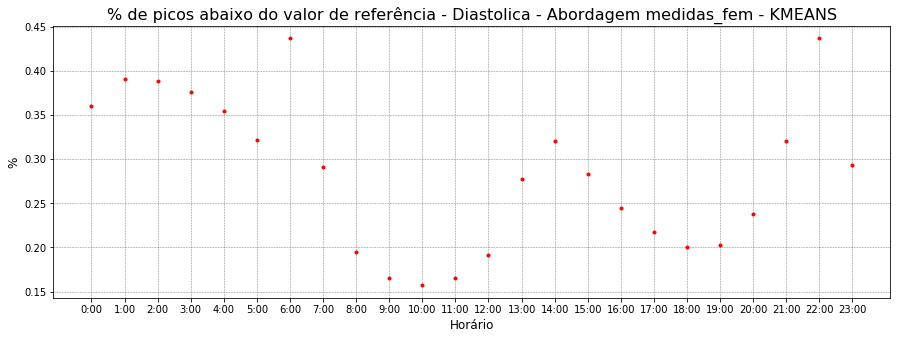

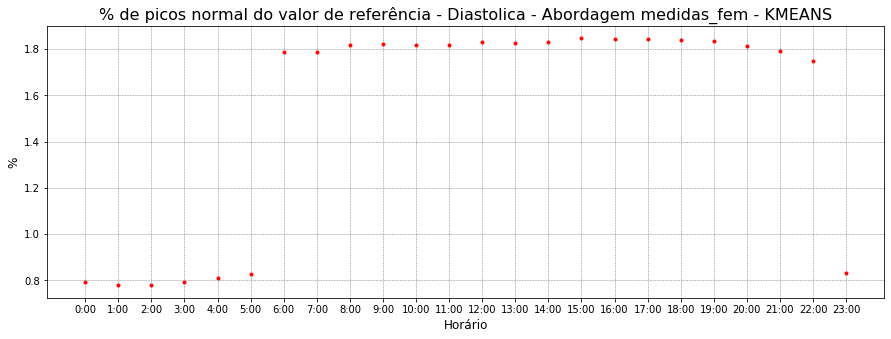

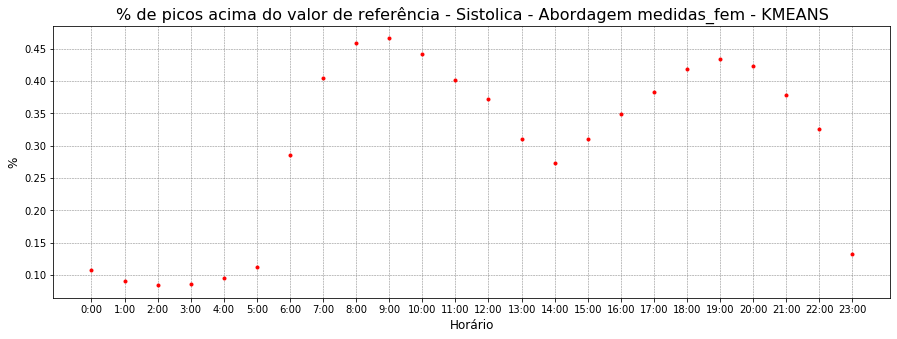

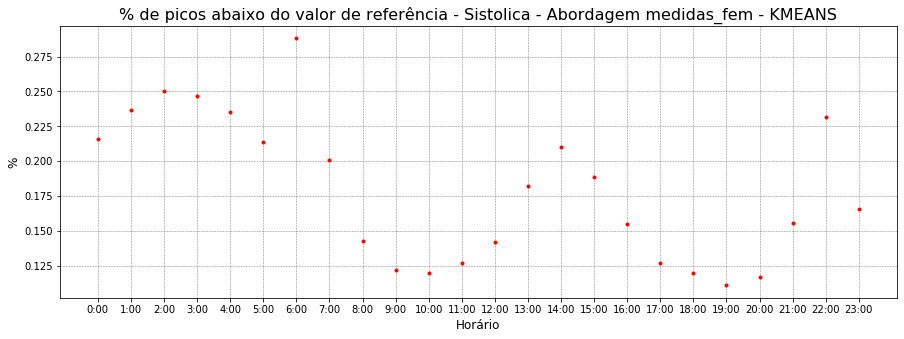

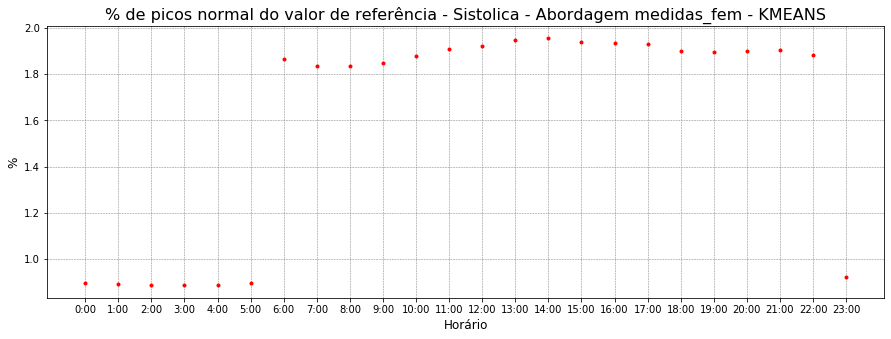

In [14]:
for df_abordagem,abordagem in zip(ls_abordagens,ls_nomes):
    df, qtd_picos = conta_picos_df(df_abordagem,abordagem,50)
    
    df['tipo'] = df['Horário'].apply(lambda x: x.split(' ')[0])
    df['tipo2'] = df['Horário'].apply(lambda x: x.split(' ')[4])
    df['Horário'] = df['Horário'].apply(lambda x: x.split(' ')[1])

    df_diast = df[df['tipo'] == 'Diast'].loc[:,['Horário','%','tipo2']]
    df_diast_max = df_diast[df_diast['tipo2'] == 'Max'].loc[:,['Horário','%']]
    df_diast_min = df_diast[df_diast['tipo2'] == 'Min'].loc[:,['Horário','%']]
    df_diast_normal = df_diast[df_diast['tipo2'] == 'Normal'].loc[:,['Horário','%']]
    
    df_sist = df[df['tipo'] == 'Sist'].loc[:,['Horário','%','tipo2']]
    df_sist_max = df_sist[df_sist['tipo2'] == 'Max'].loc[:,['Horário','%']]
    df_sist_min = df_sist[df_sist['tipo2'] == 'Min'].loc[:,['Horário','%']]
    df_sist_normal = df_sist[df_sist['tipo2'] == 'Normal'].loc[:,['Horário','%']]
    
    grafico_percentual(df_diast_max, abordagem, 'Diastolica', 'acima')
    grafico_percentual(df_diast_min, abordagem, 'Diastolica', 'abaixo')
    grafico_percentual(df_diast_normal, abordagem, 'Diastolica', 'normal')
    
    grafico_percentual(df_sist_max, abordagem, 'Sistolica', 'acima')
    grafico_percentual(df_sist_min, abordagem, 'Sistolica', 'abaixo')
    grafico_percentual(df_sist_normal, abordagem, 'Sistolica', 'normal')

In [15]:
sns.boxplot

<function seaborn.categorical.boxplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)>

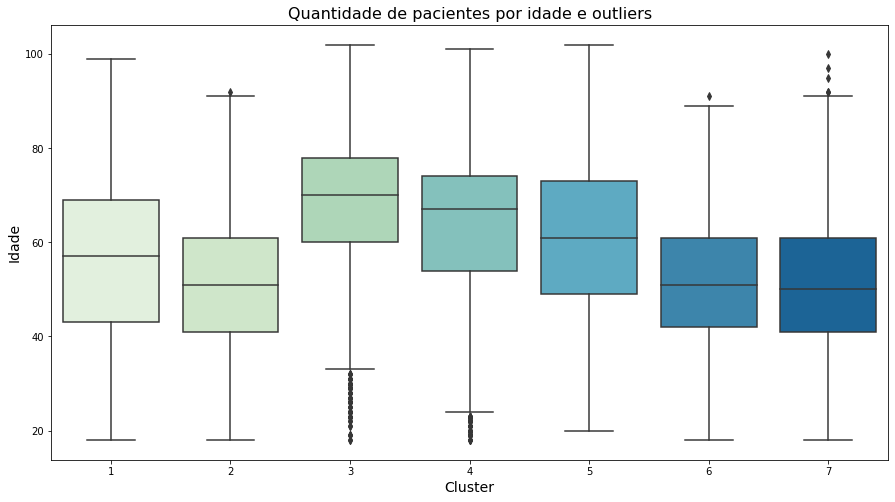

In [16]:
dataset = ls_abordagens[1]
def boxplot(x,y,titulo,xlabel,ylabel,abordagem):
    import seaborn as sns
    #sns.set_theme(style="whitegrid", palette="GnBu")
    #sns.color_palette("GnBu", 8)
    plt.figure(figsize=(15,8))
    ax = sns.boxplot(x=x,y=y, palette="GnBu")
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(titulo, fontsize=16)
    plt.savefig(DIR_ABORDAGENS / "graficos_analise" / "boxplot" / f'boxplot_{abordagem.lower().replace(" ","_")}_{ylabel.lower()}.svg',
               bbox_inches="tight", pad_inches=1)
    plt.show()
boxplot(dataset['grupo'],dataset['idade'],'Quantidade de pacientes por idade e outliers','Cluster'
        ,'Idade','medidas')

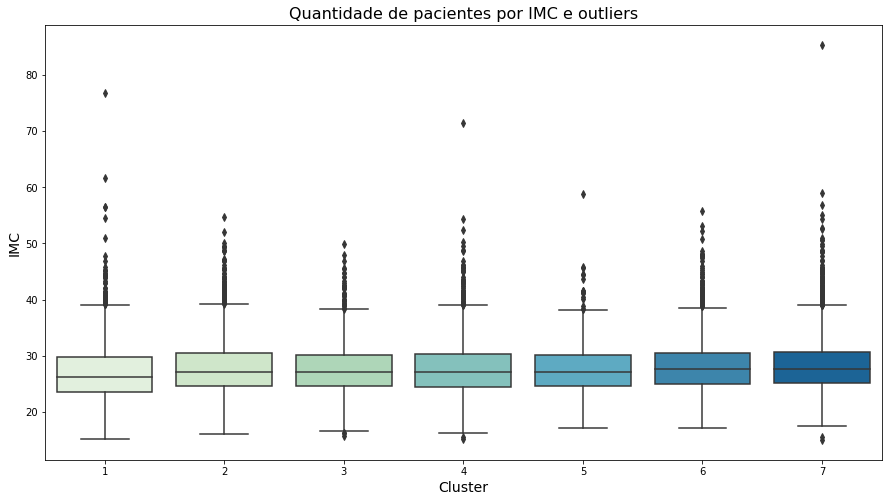

In [17]:
boxplot(dataset['grupo'],dataset['IMC'],'Quantidade de pacientes por IMC e outliers','Cluster','IMC','medidas')

In [18]:
df_genero = dataset.groupby(['grupo','genero'])['genero'].count().to_frame()
df_genero.columns = ['QTD']
df_genero = df_genero.reset_index()
df_genero.columns

Index(['grupo', 'genero', 'QTD'], dtype='object')

In [19]:
df_genero

,grupo,genero,QTD
0,1,F,2138
1,1,M,828
2,2,F,2141
3,2,M,1982
4,3,F,1131
5,3,M,616
6,4,F,1884
7,4,M,961
8,5,F,378
9,5,M,364


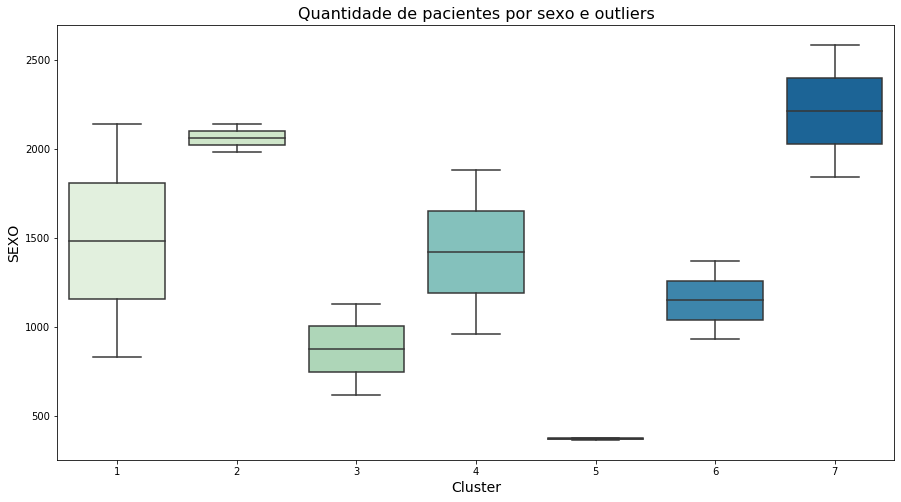

In [20]:
boxplot(df_genero['grupo'],df_genero['QTD'],'Quantidade de pacientes por sexo e outliers','Cluster','SEXO','medidas')